## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.2.5
numpy version: 1.20.2
seaborn version: 0.11.1
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('../../Nattawat/dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
# Tempolary data preparation and just use for build model 

In [5]:
df = df.drop(columns=['province', 'year'])

In [6]:
df = df.loc[df['year_num'] == 1]
df

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
0,1,1,137,1976.0,81.9,37.5,18.4,27.2,4,0.23,1714
1,1,2,113,1907.6,73.6,39.8,19.2,29.2,3,0.05,6291
2,1,3,97,963.2,67.8,42.3,14.8,29.2,5,0.41,1212
3,1,4,105,1283.6,77.1,41.8,9.9,27.2,0,0.00,1420
4,1,5,112,967.0,71.3,41.5,14.4,28.4,1,0.15,669
...,...,...,...,...,...,...,...,...,...,...,...
72,1,73,106,1329.9,69.7,41.7,12.6,28.1,1,0.16,616
73,1,74,117,1129.1,70.6,41.9,9.8,27.5,0,0.00,375
74,1,75,90,825.6,68.6,41.8,14.0,28.5,1,0.33,302
75,1,76,105,771.4,71.3,42.4,14.2,29.1,0,0.00,1561


In [7]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,77.0,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,1.0,39.000000,116.298701,1375.227273,74.480519,39.741558,14.924675,27.985714,1.857143,0.102857,1596.428571
std,0.0,22.371857,25.780483,617.275140,4.180312,2.688932,3.419493,0.854048,2.553193,0.119592,1417.353579
min,1.0,1.000000,76.000000,771.400000,66.500000,24.000000,8.700000,25.300000,0.000000,0.000000,113.000000
25%,1.0,20.000000,101.000000,960.400000,71.300000,38.500000,12.200000,27.400000,0.000000,0.000000,595.000000
50%,1.0,39.000000,108.000000,1171.600000,73.600000,40.000000,14.400000,28.000000,1.000000,0.070000,1212.000000
75%,1.0,58.000000,127.000000,1628.000000,77.700000,41.700000,18.300000,28.600000,3.000000,0.180000,2134.000000
max,1.0,77.000000,175.000000,3918.400000,83.600000,43.100000,22.900000,29.600000,13.000000,0.460000,7194.000000


In [8]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [9]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]

In [10]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg
72,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163
73,0.414141,0.113664,0.239766,0.937173,0.077465,0.511628
74,0.141414,0.017223,0.122807,0.931937,0.373239,0.744186
75,0.292929,0.000000,0.280702,0.963351,0.387324,0.883721
76,0.303030,0.177471,0.187135,0.926702,0.274648,0.651163


In [12]:
# log transform to target variable impove RMSE value.

# df['patient'] = np.log(df['patient'])

In [13]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [14]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [15]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,patient
count,77.0,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00
mean,1.0,39.00,0.41,0.19,0.47,0.82,0.44,0.62,1596.43
std,0.0,22.37,0.26,0.20,0.24,0.14,0.24,0.20,1417.35
min,1.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,113.00
25%,1.0,20.00,0.25,0.06,0.28,0.76,0.25,0.49,595.00
50%,1.0,39.00,0.32,0.13,0.42,0.84,0.40,0.63,1212.00
75%,1.0,58.00,0.52,0.27,0.65,0.93,0.68,0.77,2134.00
max,1.0,77.00,1.00,1.00,1.00,1.00,1.00,1.00,7194.00


# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


##  Features selection for Linear Regression Model

In [16]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'patient'],
      dtype='object')

In [17]:
X = df_pre[[ 'day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg']]
y = df_pre['patient']

# 'year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',

In [18]:
X = np.array(X)
#y = np.array(y)

## Repeated k-Fold Cross-Validation


The scikit-learn Python machine learning library provides an implementation of repeated k-fold cross-validation via the RepeatedKFold class.

The main parameters are the number of folds (n_splits), which is the “k” in k-fold cross-validation, and the number of repeats (n_repeats).

A good default for k is k=10.

A good default for the number of repeats depends on how noisy the estimate of model performance is on the dataset. A value of 3, 5, or 10 repeats is probably a good start. More repeats than 10 are probably not required.

In [19]:
from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0) #Test 5Folds, 3Repeats

for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
        
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

## Creating and Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

In [22]:
# Import libraries for tuning hyperparameter

from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
# Cross-Validation in sklearn

In [24]:
# fit the model
lm.fit(X_train, y_train)    

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [25]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([-0.10947405,  0.05986273, -1.13159222, -1.89164083, -0.58149701])

In [26]:
# print the intercept
print(lm.intercept_)

3465.2975064307248


## Predictions from our Model

In [27]:
# Predicting 
predictions = lm.predict(X_test)

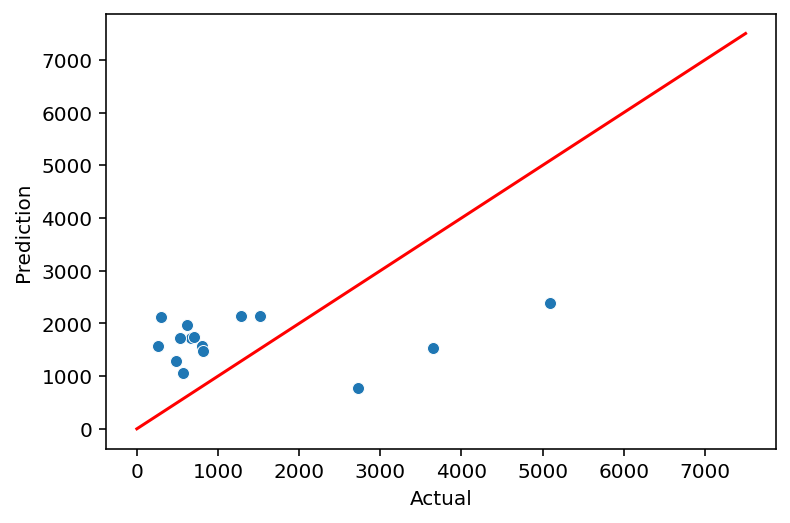

In [28]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')

# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

### Actual value and the predicted value

In [29]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
4,669,1718.289427
11,572,1067.322205
13,5089,2382.793235
14,488,1287.371083
19,802,1571.349373
22,3653,1529.791534
26,255,1571.349373
40,816,1484.184019
52,710,1746.776537
60,1518,2137.636010


**Residual Histogram**

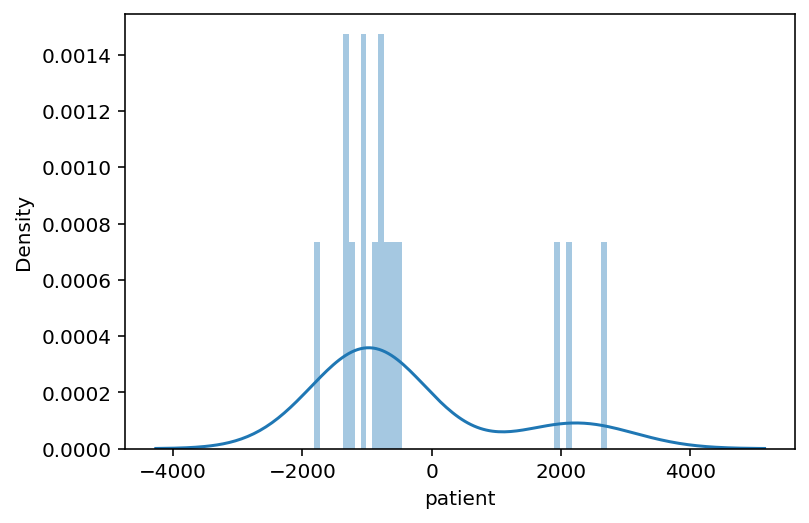

In [30]:
sns.distplot((y_test-predictions),bins=50)
plt.show()

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)))
print('R squared of Test Set: {:.2f}'.format(lm.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.06
R squared of Test Set: -0.06
Mean Absolute Error (MAE): 1251.3118
Root Mean Squared Error (RMSE): 1394.8840
